In [3]:
import matplotlib.pyplot as plt
import numpy as np

In [4]:
import math

a = 1000.05624604543e-3
b = 10.6068254211646e-3

f1 = 0.0e-3
f2 = f1 + 2.0 * math.sqrt(a * a + b * b)

# parabola part
p = 0.0562460454334836e-3

# whole mirror
WD = 1902.50110774383e-3
ML = 200.0e-3

param1 = 1.0 / (a * a)
param2 = -(f1 + f2) / (a * a) + 4.0 * p / (b * b)
param3 = math.pow(f1 + f2, 2) / (4.0 * a * a) - 4.0 * p * (p + f2) / (b * b) - 1.0
seam = (-param2 - math.sqrt(param2**2 - 4.0 * param1 * param3)) / (2.0 * param1)

def parabola(z):
    return math.sqrt(-4.0 * p * (z - p - f2))
def hyperbola(z):
    return b * math.sqrt((z - (f1 + f2) / 2)**2 / a**2 - 1.0)

entrance_radius = parabola(f1 - WD - ML)
seam_radius = parabola(seam)
exit_radius = hyperbola(f1 - WD)
ring_radius = seam_radius * WD / (f1 - seam)

In [67]:
ring_intensity = np.fromfile('../../data/mirror_experiment/firsttake/ring_intensity')
ring_phase = np.fromfile('../../data/mirror_experiment/firsttake/ring_phase')
N = int(math.sqrt(ring_intensity.shape[0]))
ring_intensity = ring_intensity.reshape((N, N))
ring_phase = ring_phase.reshape((N, N))

intensity_max = np.max(ring_intensity)
ring_intensity /= intensity_max

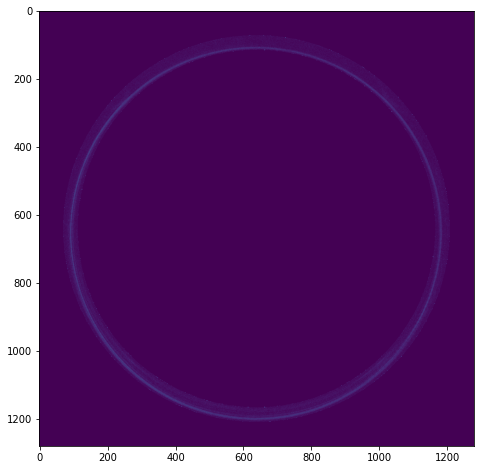

In [68]:
plt.figure(figsize=(8, 8))
plt.imshow(np.sqrt(ring_intensity))

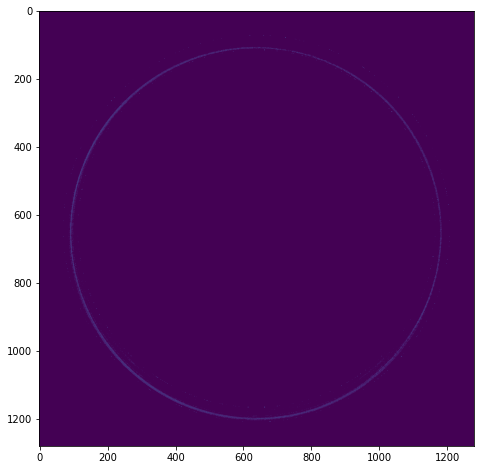

In [69]:
plt.figure(figsize=(8, 8))
threshold_rtI = np.sqrt(ring_intensity) * (ring_intensity > 0.01)
plt.imshow(threshold_rtI)

[633.5 653.5 546.3]
5.225272139671422e-05
0.06688348338779421
-0.0003396426890786424 0.000705411738855642
float64


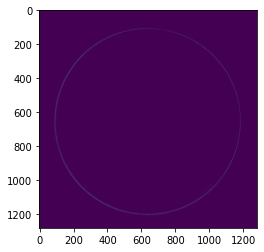

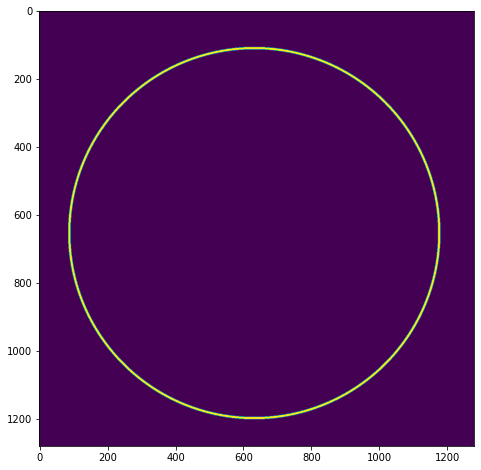

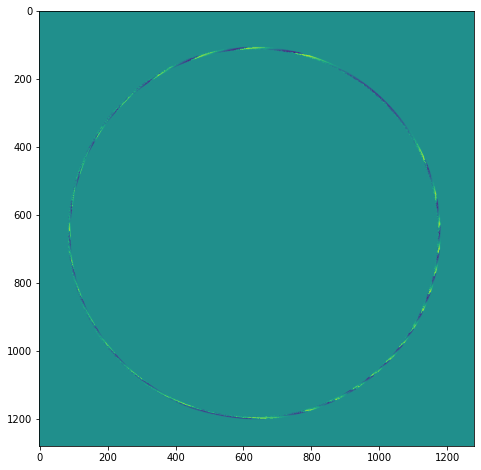

In [80]:
import cv2

img = threshold_rtI.copy()
img *= 255 / np.max(img)
img = img.astype(dtype=np.uint8)
#img = cv2.medianBlur(img, 5)
plt.figure()
plt.imshow(img)

cimg = cv2.cvtColor(img, cv2.COLOR_GRAY2BGR)

detected_circle = cv2.HoughCircles(img,cv2.HOUGH_GRADIENT,1, 0.8 * N,
                            param1=50,param2=30,minRadius=0,maxRadius=0)[0][0]
print(detected_circle)
ccd_pitch = 9.0e-6
wavelength = 632.8e-9
binning = 2
exit_length = wavelength * WD / (binning * ccd_pitch)
exit_pixel = exit_length / N
print(exit_pixel)
print(exit_length)

cx = (detected_circle[0] - N//2) * exit_pixel
cy = (detected_circle[1] - N//2) * exit_pixel
print(cx, cy)
x = np.linspace(-0.5 * exit_length, 0.5 * exit_length, N)
y = x.copy()
x, y = np.meshgrid(x, y)
r = np.hypot(x - cx, y - cy)

diameter_error = -0.00025
inner_radius = ring_radius + diameter_error
outer_radius = exit_radius + diameter_error
ring_mask = (inner_radius <= r) & (r <= outer_radius)

plt.figure(figsize=(8, 8))
plt.imshow(ring_mask)
ring_mask_out = 1.0 * ring_mask
print(ring_mask_out.dtype)
ring_mask_out.tofile('/home/dieu/mimuralab/bthesis/ring_mask')

plt.figure(figsize=(8, 8))
plt.imshow(ring_mask * ring_phase)
ring_effective = ring_mask * ring_phase
ring_effective.tofile('/home/dieu/mimuralab/bthesis/ring_phase')

In [79]:
print(ring_mask_out)

[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]
